In [0]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [0]:
data=pd.read_csv('winequality-red.csv', sep=';') #importing the data
for i in range(11): # except quality feature every column included here
   x=data.iloc[:,i]
   x_minmax_scaled=(x-x.min())/(x.max()-x.min()) # Normalization using min-max scaling
   data.iloc[:,i]=x_minmax_scaled


In [458]:
#n=len(data.axes[0]) #to find number of rows in each attribute
#print('Number of rows are: ', n)
n=1599
for i in range(n):
  x=data.iloc[i,11]
  if(x<=6) :
    x=0
  else :
    x=1
  data.iloc[i,11]=x   
  
  

print(data.iloc[0:50,:])


    fixed acidity  volatile acidity  citric acid  ...  sulphates   alcohol  quality
0        0.247788          0.397260         0.00  ...   0.137725  0.153846        0
1        0.283186          0.520548         0.00  ...   0.209581  0.215385        0
2        0.283186          0.438356         0.04  ...   0.191617  0.215385        0
3        0.584071          0.109589         0.56  ...   0.149701  0.215385        0
4        0.247788          0.397260         0.00  ...   0.137725  0.153846        0
5        0.247788          0.369863         0.00  ...   0.137725  0.153846        0
6        0.292035          0.328767         0.06  ...   0.077844  0.153846        0
7        0.238938          0.363014         0.00  ...   0.083832  0.246154        1
8        0.283186          0.315068         0.02  ...   0.143713  0.169231        1
9        0.256637          0.260274         0.36  ...   0.281437  0.323077        0
10       0.185841          0.315068         0.08  ...   0.125749  0.123077  

# Defining All function here

In [0]:
def cost_function(X, y, theta): # to compute cost, cost function is defined
    m = len(y)
    z=(X @ theta) # dot production between input X and params 
    h_theta=1 / (1 + np.exp(-z)) #defining logistic hypothesis function i.e. sigmoid function
    # here '@' is used for dot product or matrix multiplication    
    cost = (1/m)*(((-y).T @ np.log(h_theta))-((1-y).T @ np.log(1-h_theta)))
    return cost


def GD(X, y, params, lr, itr): #to udate parameter gradient descent is defined
    m = len(y) # size of sample
    J_theta = np.zeros((itr,1)) # recording history of cost function over iteration

    for i in range(itr):
        z=(X @ params) # dot production between input X and params 
        h=1 / (1 + np.exp(-z)) #defining logistic hypothesis function i.e. sigmoid function
        params = params - (lr/m) * (X.T @ (h - y)) 
        J_theta[i] = cost_function(X, y, params)

    return (J_theta, params)

# NOW FOR CALCULATING PARAMS, COST FUNCTION AND PREDICTED VALUE

In [460]:
# initialisation
X=data.iloc[:,0:11]
y=data.iloc[:,11]
m = len(y)

X = np.hstack((np.ones((m,1)),X)) # adding/inserting bias as 1 
y = y[:,np.newaxis]
n = np.size(X,1)
params = np.zeros((n,1))

iterations = 1500
learning_rate = 0.01
# Assigning value to function now
cost_function_initial = cost_function(X, y, params) # initial  value of cost function before start of iteration

print("Initial Cost is: {} \n".format(cost_function_initial))

(J_theta, params_final) = GD(X, y, params, learning_rate, iterations) # to calculater J_theta over iteration and parameter final updated value

print(" Final Updated value of Parameters are: \n", params_final, "\n")



Initial Cost is: [[0.69314718]] 

 Final Updated value of Parameters are: 
 [[-0.97950192]
 [-0.21439513]
 [-0.43750352]
 [-0.04074204]
 [-0.07839054]
 [-0.1592965 ]
 [-0.24889738]
 [-0.21465394]
 [-0.56623354]
 [-0.47626792]
 [-0.08432961]
 [ 0.03089778]] 



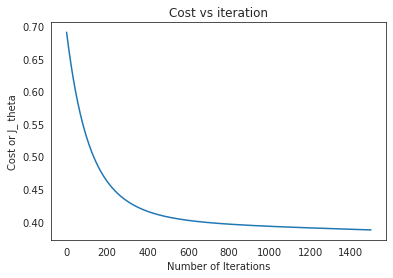

In [461]:
# for plotting graph between Cost function and iteration
plt.figure()

plt.plot(range(iterations),J_theta)
plt.title("Cost vs iteration")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost or J_ theta")
plt.show()

In [462]:
# to calculate accuracy
z=(X @ params) # dot production between input X and params 
h=1 / (1 + np.exp(-z)) #defining logistic hypothesis function i.e. sigmoid function
y_pred = np.round(h) # using threshold vaue 0.5 we just rounding up it
accuracy = float(sum(y_pred == y))/ float(len(y))*100

print('Accuracy without scikit learn modal=',accuracy) # Accuracy without any model impletation

Accuracy without scikit learn modal= 86.42901813633522


# Part 2: using scikit learn package

In [0]:
from sklearn.linear_model import LogisticRegression

In [464]:
'''X1=X # taking from above part
y1=y # taking value from above part
clf = LogisticRegression(random_state=0).fit(X1, y1)
y_pred_sklearn= LogisticRegression.predict(X1)'''
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
 
x1 = X
y1 = y
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.33, random_state=1)
logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)
 
y_pred_sklearn = logmodel.predict(x_test)

print('Accuracy from scikit learn model=',accuracy_score(y_test, y_pred_sklearn)*100)

Accuracy from scikit learn model= 87.68939393939394


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [465]:
'''accuracy1=clf.score(X, y) * 100
print('Accuracy from scikit learn model=',accuracy1)'''

"accuracy1=clf.score(X, y) * 100\nprint('Accuracy from scikit learn model=',accuracy1)"

# Part 3: 3 fold Cross validation

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [0]:
X2=X # taking from above part
y2=y # taking value from above part
#X_train, X_test, y_train, y_test = train_test_split(X2, y2, random_state=6)



In [468]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
accuracy_logistic=cross_val_score(logreg, X2, y2, cv=3, scoring='accuracy').mean()
print('Mean accuracy of 3 fold cross validation for logistic regression=',accuracy_logistic*100)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean accuracy of 3 fold cross validation for logistic regression= 86.9918699186992


In [469]:
#precision recall for Logistic regresion without sklearn
from sklearn.metrics import precision_recall_fscore_support as score

#predicted = [1,2,3,4,5,1,2,1,1,4,5] 
#y_test = [1,2,3,4,5,1,2,1,1,4,1]

precision, recall, fscore, support = score(y1, y_pred) # y_pred is value from logistic regression classifier

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))

precision: [0.86429018 0.        ]
recall: [1. 0.]
fscore: [0.92720564 0.        ]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [470]:

#precision recall with sklearn classifier
from sklearn.metrics import precision_recall_fscore_support as score


precision, recall, fscore, support = score(y_test, y_pred_sklearn) # y_pred is value from logistic regression classifier

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))


precision: [0.89065606 0.6       ]
recall: [0.97816594 0.21428571]
fscore: [0.93236212 0.31578947]
